In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot,add_constant
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import confusion_matrix
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc
import seaborn as sns

%matplotlib inline

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rc('font',family='Malgun Gothic')

In [2]:
#파일 읽어옴
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')

# 최종변수 선택

ROLLING_TEMP_T5

FUR_SZ_TEMP

ROLLING_DESCALING

PT_WGT

FUR_EXTEMP : 로지스틱에서 안됨

PT_THK

FUR_HZ_TEMP


# 로지스틱 회귀분석

In [3]:
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
df['SCALE']=np.where(df['SCALE']=='불량',0,1)
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]


df.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [4]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))

print('test data size:{}'.format(df_test.shape))



train data size:(497, 18)
test data size:(213, 18)


In [5]:
df_train.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
153,0,JS-SS400,C0,35.15,2466,31229,106250,3호기,1164,79,1167,61,296,1167,1062,적용,8,3조
231,0,JS-SS400,C0,40.16,2463,16858,39270,2호기,1139,103,1147,51,267,1147,1034,적용,6,2조
604,0,SA283-C,C0,20.18,2240,39679,84480,3호기,1170,78,1159,59,342,1159,1044,적용,8,3조
286,1,NV-A,C0,24.18,2848,31724,17150,2호기,1136,49,1160,71,262,1160,976,적용,8,4조
58,1,COMMON,T8,65.69,2498,11978,15430,3호기,1138,99,1129,86,352,1129,847,적용,6,2조


In [6]:
# #범주형 변수가 많은 spec과 STEEL_KIND변수를 제외하고 모델을 구현한다.

log_model=Logit.from_formula('SCALE ~ ROLLING_TEMP_T5+ROLLING_DESCALING+PT_WGT+FUR_EXTEMP+PT_THK+FUR_HZ_TEMP', df_train)

log_result=log_model.fit()
print(log_result.summary())



Optimization terminated successfully.
         Current function value: 0.398697
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  497
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 May 2019   Pseudo R-squ.:                  0.3592
Time:                        21:56:23   Log-Likelihood:                -198.15
converged:                       True   LL-Null:                       -309.22
                                        LLR p-value:                 3.648e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            98.7692     16.030      6.161      0.000      67.351     130.188
ROLLING_

In [7]:
#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)



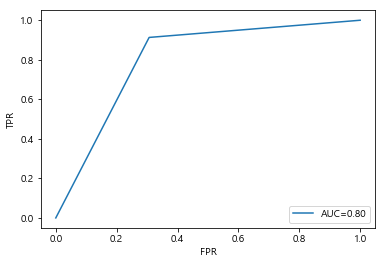

In [8]:
from sklearn.linear_model import LogisticRegression

model=['logistic','Decision Tree','RandomForest','knn']
train_accuracy1=[]; test_accuracy1=[]
model_f1_score=[]
model_auc=[]

df_model= LogisticRegression()
df_model.fit(df_train_x,df_train_y)
train_accuracy1.append(df_model.score(df_train_x,df_train_y))
test_accuracy1.append(df_model.score(df_test_x,df_test_y))


y_pred=df_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# 의사결정트리

In [9]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

tree_un=DecisionTreeClassifier(random_state=1234)
print(tree_un.fit(df_train_x,df_train_y),'\n')
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best') 

score on training set:1.000
score on test set:0.901


,depth,TrainScore,TestScore
0,1,0.893,0.878
1,2,0.928,0.901
2,3,0.936,0.906
3,4,0.936,0.906
4,5,0.944,0.906
5,6,0.948,0.906
6,7,0.962,0.915
7,8,0.972,0.915
8,9,0.982,0.901
9,10,0.986,0.901


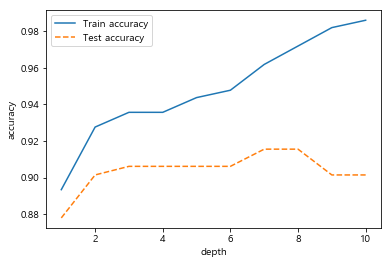

In [10]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

#depth= 3 과적합 방지

,split,TrainScore,TestScore
0,10,0.936,0.906
1,20,0.936,0.906
2,30,0.936,0.906
3,40,0.936,0.906
4,50,0.936,0.906
5,60,0.936,0.906
6,70,0.936,0.906
7,80,0.936,0.906
8,90,0.936,0.906
9,100,0.936,0.906


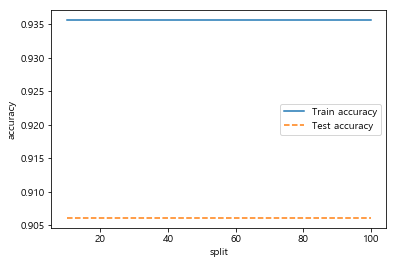

In [11]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split,max_depth=3,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()

#split는 testscore의 값이 바뀌지 않는다. 그러므로 파라미터에서 제외한다.

,leaf,TrainScore,TestScore
0,10,0.928,0.901
1,20,0.922,0.901
2,30,0.911,0.864
3,40,0.893,0.878
4,50,0.893,0.878
5,60,0.893,0.878
6,70,0.893,0.878
7,80,0.893,0.878
8,90,0.893,0.878
9,100,0.893,0.878


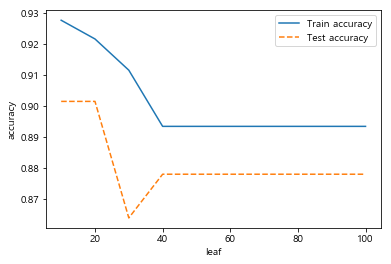

In [12]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=3,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=20

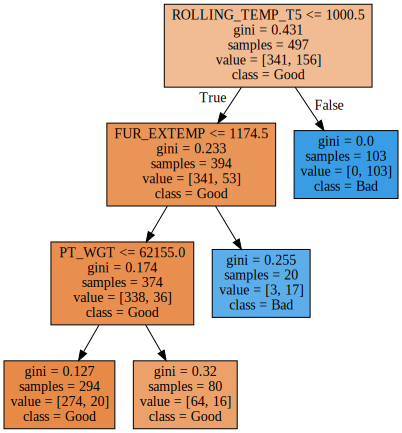

accuracy on test set:0.901
confusion matrix:
[[138   0]
 [ 21  54]]


In [13]:
v_feature_names=df_train_x.columns
tree_final=DecisionTreeClassifier(random_state=1234,min_samples_leaf=20 ,max_depth=3)
tree_final.fit(df_train_x,df_train_y)
export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


y_pred=tree_final.predict(df_test_x)

print('accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

#양품=0,good 

[0.8430583501006036, 0.9275653923541247] [0.8356807511737089, 0.9014084507042254]


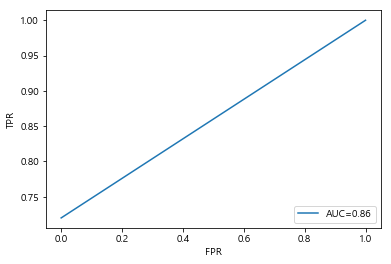

In [14]:
df_model=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
df_model.fit(df_train_x,df_train_y)
train_accuracy1.append(df_model.score(df_train_x,df_train_y))
test_accuracy1.append(df_model.score(df_test_x,df_test_y))

print(train_accuracy1,test_accuracy1)
y_pred=df_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# 랜덤포레스트

In [15]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

tree_un=RandomForestClassifier(random_state=1234)
print(tree_un.fit(df_train_x,df_train_y),'\n')
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False) 

score on training set:0.994
score on test set:0.911


,n_estimator,TrainScore,TestScore
0,10,0.994,0.911
1,20,1.000,0.901
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.901
5,60,1.000,0.901
6,70,1.000,0.901
7,80,1.000,0.906
8,90,1.000,0.906
9,100,1.000,0.906


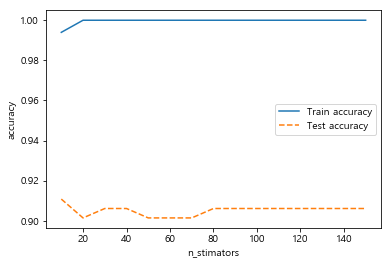

In [16]:
train_accuracy=[]
test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimator']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['TestScore']=test_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_stimators')
plt.legend()

#n=10

,depth,TrainScore,TestScore
0,1,0.863,0.840
1,2,0.899,0.883
2,3,0.928,0.901
3,4,0.936,0.901
4,5,0.948,0.911
5,6,0.954,0.897
6,7,0.970,0.892
7,8,0.986,0.915
8,9,0.988,0.915
9,10,0.988,0.915


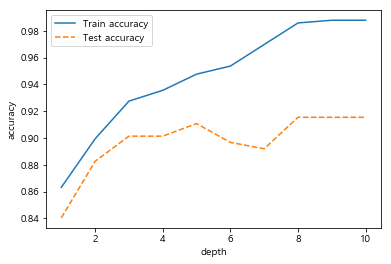

In [17]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()
#depth=5

,split,TrainScore,TestScore
0,10,0.952,0.911
1,20,0.944,0.911
2,30,0.946,0.906
3,40,0.934,0.901
4,50,0.938,0.901
5,60,0.936,0.906
6,70,0.928,0.901
7,80,0.926,0.901
8,90,0.926,0.901
9,100,0.926,0.901


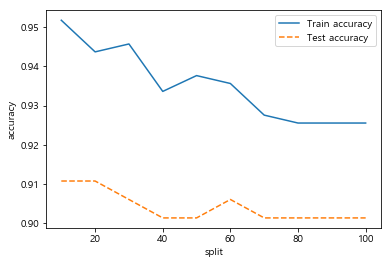

In [18]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=5,n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()
# split=50

,leaf,TrainScore,TestScore
0,10,0.926,0.901
1,20,0.903,0.883
2,30,0.885,0.873
3,40,0.883,0.873
4,50,0.879,0.869
5,60,0.877,0.859
6,70,0.855,0.850
7,80,0.833,0.826
8,90,0.821,0.826
9,100,0.817,0.803


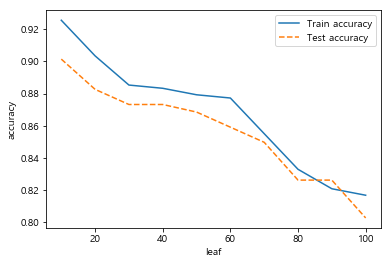

In [19]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=5,min_samples_split=50,\
                              n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=20

In [20]:
rf_final=RandomForestClassifier(random_state=1234,n_estimators=10,\
                             min_samples_leaf=20 ,max_depth=5,min_samples_split=50)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))



accuracy on trainig set:0.903
accuracy on test set:0.883
confusion matrix:
[[136   2]
 [ 23  52]]


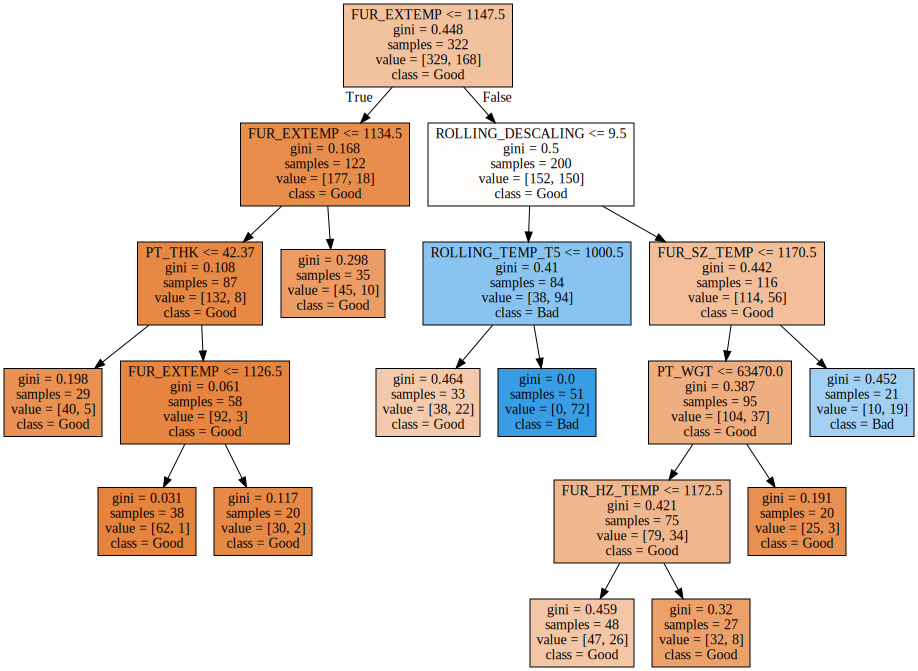

In [21]:
v_feature_names=df_train_x.columns



export_graphviz(rf_final.estimators_[0],out_file='rf_final_0.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('rf_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#양품=0,good

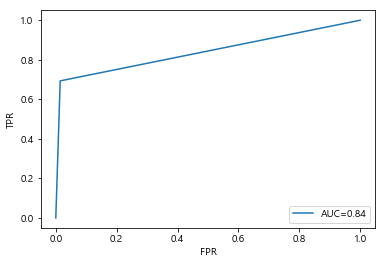

In [22]:
rf_model=RandomForestClassifier(random_state=1234,n_estimators=10,\
                             min_samples_leaf=20 ,max_depth=5,min_samples_split=50)
rf_model.fit(df_train_x,df_train_y)
train_accuracy1.append(rf_model.score(df_train_x,df_train_y))
test_accuracy1.append(rf_model.score(df_test_x,df_test_y))
y_pred=rf_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)


plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# knn

In [23]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#x변수 더미 처리
df_x=pd.get_dummies(df_x)

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

knn_un=KNeighborsClassifier()
knn_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

score on training set:0.809
score on test set:0.690


N SCORE


,n,TrainScore,TestScore
0,1,1.000,0.690
1,2,0.855,0.709
2,3,0.843,0.695
3,4,0.803,0.718
4,5,0.809,0.690
5,6,0.793,0.700
6,7,0.801,0.700
7,8,0.789,0.709
8,9,0.785,0.723
9,10,0.771,0.676


Text(0.5,0,'n')

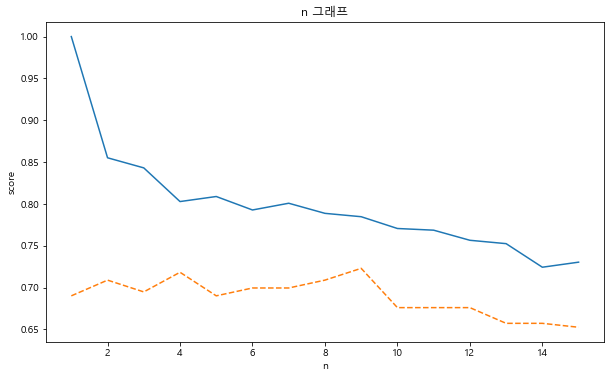

In [24]:
#n 최적 값 찾기
train_score=[]; test_score=[]
para_n=[i for i in range(1,16)]
for v_n_neighbors in para_n:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#n 스코어
print('N SCORE')
df_score_knn = pd.DataFrame()
df_score_knn['n']=para_n
df_score_knn['TrainScore']=train_score
df_score_knn['TestScore']=test_score
display(df_score_knn.round(3))

#n 그래프
fig = plt.figure(figsize=(10, 20)) 
gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[1, 1, 1], 
                       width_ratios=[9])

ax1 = fig.add_subplot(gs[0])
plt.title('n 그래프')
plt.plot(para_n,train_score,linestyle='-',label='Train Score')
plt.plot(para_n,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n')

# n=4

W SCORE


,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
neighbors,,,,
1,1.0,1.000000,0.690141,0.690141
2,1.0,0.855131,0.690141,0.708920
3,1.0,0.843058,0.685446,0.694836
4,1.0,0.802817,0.685446,0.718310
5,1.0,0.808853,0.699531,0.690141
6,1.0,0.792757,0.685446,0.699531
7,1.0,0.800805,0.694836,0.699531
8,1.0,0.788732,0.699531,0.708920
9,1.0,0.784708,0.699531,0.723005


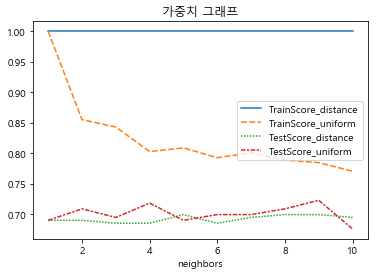

In [25]:
#n=9 를 임의로 설정


#가중치 최적 값 찾기
train_score2=[]; test_score2=[]
para_n=[i for i in range(1,11)]*2
para_w=(['uniform']*10)+(['distance']*10)
for (v_n_neighbors,v_weights) in zip(para_n,para_w):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score2.append(knn.score(df_train_x,df_train_y))
    test_score2.append(knn.score(df_test_x,df_test_y))

#가중치 스코어
print('W SCORE')
df_score_w = pd.DataFrame()
df_score_w['neighbors']=para_n
df_score_w['weight']=para_w
df_score_w['TrainScore']=train_score2
df_score_w['TestScore']=test_score2


#가중치 표

df_score_w_pivot=df_score_w.pivot(index='neighbors',columns='weight',values=['TrainScore','TestScore'])
level0=df_score_w_pivot.columns.get_level_values(0)
level1=df_score_w_pivot.columns.get_level_values(1)
df_score_w_pivot.columns=level0+'_'+level1
display(df_score_w_pivot)

#가중치 그래프
ax2 = fig.add_subplot(gs[1])
plt.title('가중치 그래프')
sns.lineplot(data=df_score_w_pivot)

#n=4일때 uniform의 testscore가 더 높으므로 uniform을 선택한다.

metric SCORE


,neighbors,metric,TrainScore,TestScore
0,1,minkowski,1.000,0.690
1,2,minkowski,0.855,0.709
2,3,minkowski,0.843,0.695
3,4,minkowski,0.803,0.718
4,5,minkowski,0.809,0.690
5,6,minkowski,0.793,0.700
6,7,minkowski,0.801,0.700
7,8,minkowski,0.789,0.709
8,9,minkowski,0.785,0.723
9,10,minkowski,0.771,0.676


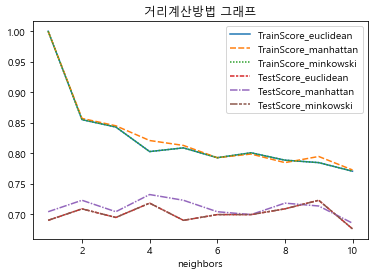

In [26]:
#최적 거리계산 방법 찾기
train_score3=[]; test_score3=[]
para_n=[i for i in range(1,11)]*3
para_m=(['minkowski']*10)+(['euclidean']*10)+(['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n,para_m):
    knn=KNeighborsClassifier(weights='uniform',n_neighbors=v_n_neighbors,metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score3.append(knn.score(df_train_x,df_train_y))
    test_score3.append(knn.score(df_test_x,df_test_y))


                       
#거리계산방법 스코어
print('metric SCORE')
df_score_m = pd.DataFrame()
df_score_m['neighbors']=para_n
df_score_m['metric']=para_m
df_score_m['TrainScore']=train_score3
df_score_m['TestScore']=test_score3
display(df_score_m.round(3))

#거리계산방법 그래프
ax3 = fig.add_subplot(gs[2])
plt.title('거리계산방법 그래프')
df_score_m_pivot=df_score_m.pivot(index='neighbors',columns='metric',values=['TrainScore','TestScore'])
level0=df_score_m_pivot.columns.get_level_values(0)
level1=df_score_m_pivot.columns.get_level_values(1)
df_score_m_pivot.columns=level0+'_'+level1
sns.lineplot(data=df_score_m_pivot)
plt.show()

#train이 낮고 test가 높은 manhattan을 선택한다.

In [27]:
#최종모델
knn_final=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='manhattan')
knn_final.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))
y_pred=knn_final.predict(df_test_x)

score on training set:0.821
score on test set:0.732


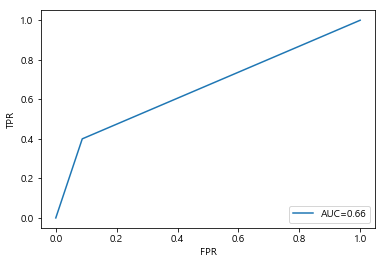

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='manhattan')
knn_model.fit(df_train_x,df_train_y)
train_accuracy1.append(knn_model.score(df_train_x,df_train_y))
test_accuracy1.append(knn_model.score(df_test_x,df_test_y))
y_pred=knn_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)




plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

,trainaccuracy,testaccuracy,f1score,auc
logistic,0.843,0.836,0.878,0.803
Decision Tree,0.928,0.901,0.837,0.860
RandomForest,0.903,0.883,0.806,0.839
knn,0.821,0.732,0.513,0.657


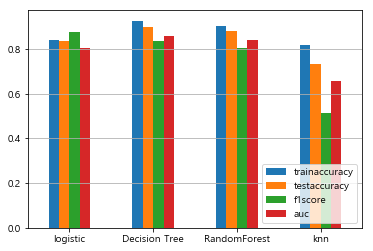

In [29]:

df_eval=pd.DataFrame(index=model)
df_eval['trainaccuracy']=train_accuracy1
df_eval['testaccuracy']=test_accuracy1
df_eval['f1score']=model_f1_score
df_eval['auc']=model_auc
display(df_eval.round(3))


df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')